# Import Libraries

Here we import all the libraries needed for loading, processing, and visualizing the dataset

In [1]:
# Import the needed libraries
import kagglehub
import os
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px  # For interactive plots
# Matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
from matplotlib.colors import SymLogNorm # For log normalization
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from shapely.geometry import Point
import geopandas as gpd
# Needed for some non-Seaborn-based enhancements
from scipy.stats import gaussian_kde
from scipy import stats
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# About the Dataset
---

Information provided for each Change Note includes: the state FIPS code; the entity name; the name and code of each county in which the entity is located (applies only to place and county subdivisions); the entity FIPS code; the type of change that occurred, the legal effective date of change; the legal effective year of change; the legal effective month of change; the legal effective day of change; a detailed description of the change; the source from which the information was obtained, the date the change was submitted to the Census Bureau's geographic change note database and the entity's 8-digit National Standard (ANSI) code.

## FIPS Codes
---
County and Equivalent Area
Each county is assigned a 3-digit code that is unique within each state. These codes are assigned alphabetically starting with 001. For example, Autauga County, Alabama, is assigned a code of 001 in the Alabama file; Montgomery County, Maryland, is assigned a code of 031 in the Maryland file.

The independent cities of Baltimore, Maryland; St. Louis, Missouri; Carson City, Nevada; and the 38 independent cities in Virginia are independent of any county and, thus, constitute primary divisions of their states. As such, independent cities are treated as county equivalents. County codes for independent cities are assigned alphabetically within the state beginning at 500. Data shown for the independent city at the place and county subdivision level are identical to the data for its county equivalent.

County Subdivision Area
Each county subdivision is assigned a 5-digit Federal Information Processing Series (FIPS) code assigned alphabetically. For example, Alamo, in Montgomery County, Arkansas is assigned code 90013.

Legal, functioning county subdivisions FIPS codes are assigned alphabetically beginning with 00001. Legal, non-functioning county subdivisions and census county divisions are assigned FIPS codes alphabetically beginning with 90000.

Places
Each place is assigned a 5-digit Federal Information Processing Series (FIPS) code assigned alphabetically. For example, Munford city, Tennessee is assigned code 51540.

In some states, places can be independent (an independent place) of any surrounding county subdivision and each county-part is treated as a separate county subdivision. This is true for all incorporated places in the District of Columbia, Maine, Massachusetts, New Hampshire, New Jersey, North Dakota, Pennsylvania, Rhode Island, South Dakota, and Wisconsin and some incorporated places in 14 additional states. In these cases, the name and codes for the county subdivision match that for the incorporated place. For example, Chicago city, Illinois, is independent of any surrounding township and is shown as two county subdivisions named Chicago city with the same codes in Cook and DuPage counties.

Note: Examples of places include Incorporated Place, Consolidated City, and Census Designated Place (Entity Type = P).

# Load the Libraries from the shape files
---

This data comes in a shape (shp) file, which contains the geometry for the states and counties, and a vector of land and water height values.

## Load the US Census County data

We will load this file directly from the zip file

In [2]:
# Load county subdivisions (cousubs)
cousubs = gpd.read_file('zip://data/cb_2020_us_cousub_500k.zip!cb_2020_us_cousub_500k.shp')
# Load state boundaries
states = gpd.read_file('zip://data/cb_2020_us_state_500k.zip!cb_2020_us_state_500k.shp')

## Shape of Geopandas Dataset

This is the shape of the dataset

In [3]:
cousubs.shape

(36502, 15)

## Info of Geopandas Dataset

This is the info of the dataset

In [4]:
cousubs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36502 entries, 0 to 36501
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     36502 non-null  object  
 1   COUNTYFP    36502 non-null  object  
 2   COUSUBFP    36502 non-null  object  
 3   COUSUBNS    36502 non-null  object  
 4   AFFGEOID    36502 non-null  object  
 5   GEOID       36502 non-null  object  
 6   NAME        36502 non-null  object  
 7   NAMELSAD    36502 non-null  object  
 8   STUSPS      36502 non-null  object  
 9   NAMELSADCO  36502 non-null  object  
 10  STATE_NAME  36502 non-null  object  
 11  LSAD        36502 non-null  object  
 12  ALAND       36502 non-null  int64   
 13  AWATER      36502 non-null  int64   
 14  geometry    36502 non-null  geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 4.2+ MB


## Samples of Geopandas Dataset

This is the head of the dataset

In [5]:
cousubs.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS             AFFGEOID       GEOID  \
0      29      195    22096  00767361  0600000US2919522096  2919522096   
1      38      099    45260  01036531  0600000US3809945260  3809945260   
2      38      017    16100  01036391  0600000US3801716100  3801716100   
3      38      093    22940  01036472  0600000US3809322940  3809322940   
4      38      079    67780  01036243  0600000US3807967780  3807967780   

       NAME           NAMELSAD STUSPS       NAMELSADCO    STATE_NAME LSAD  \
0   Elmwood   Elmwood township     MO    Saline County      Missouri   44   
1    Latona    Latona township     ND     Walsh County  North Dakota   44   
2   Cornell   Cornell township     ND      Cass County  North Dakota   44   
3  Eldridge  Eldridge township     ND  Stutsman County  North Dakota   44   
4   Rolette       Rolette city     ND   Rolette County  North Dakota   25   

       ALAND   AWATER                                           geometry  
0  181233131   377337  POLYGON ((-93.48978 39.06658, -93.48938 39.073...  
1   90848624  2941846  POLYGON ((-98.16255 48.36954, -98.05746 48.369...  
2   93440087        0  POLYGON ((-97.70538 47.04981, -97.70558 47.051...  
3   90001176  2572532  POLYGON ((-98.94567 46.97918, -98.85914 46.979...  
4    2609731        0  POLYGON ((-99.85266 48.6682, -99.83068 48.6681...

## CRS details of Geopandas Dataset

This is the Coordinate Reference System (CRS) details of the dataset

In [6]:
cousubs.crs #Coordinate Reference System

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Sample plot

Sample plot of the raw data

In [7]:
cousubs.plot()

<Axes: >

## Shape of Geopandas Dataset

This is the shape of the dataset

In [8]:
states.shape

(56, 10)

## Info of Geopandas Dataset

This is the info of the dataset

In [9]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


## Samples of Geopandas Dataset

This is the head of the dataset

In [10]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      35  00897535  0400000US35    35     NM    New Mexico   00   
1      46  01785534  0400000US46    46     SD  South Dakota   00   
2      06  01779778  0400000US06    06     CA    California   00   
3      21  01779786  0400000US21    21     KY      Kentucky   00   
4      01  01779775  0400000US01    01     AL       Alabama   00   

          ALAND       AWATER  \
0  314198560935    726482115   
1  196345992286   3383664203   
2  403671196038  20294133830   
3  102282796080   2368025703   
4  131175460655   4591915034   

                                            geometry  
0  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
1  POLYGON ((-104.05788 44.9976, -104.05078 44.99...  
2  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...  
3  MULTIPOLYGON (((-89.41728 36.49901, -89.40565 ...  
4  MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...

## CRS details of Geopandas Dataset

This is the Coordinate Reference System (CRS) details of the dataset

In [11]:
states.crs #Coordinate Reference System

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Define the cartographic constants to reduce to contiguous states

These limits are used to zoom into the contiguous states

In [12]:
# Define Cartographic constants
US_XLIM1 = -125
US_XLIM2 = -67
US_YLIM1 = 24
US_YLIM2 = 50

# Visualize the cartography of the United States (Contiguous 48 States)

This will visualize the geopandas graph, to show the states and their associated counties. This gives us the basic geometry involved in the dataset

In [13]:
# Setup Plot
fig, ax = plt.subplots(figsize=(12,6))

# US Lower 48 Bounding Box
# -125.00000, 24.00000, -67.00000, 50.00000
ax.set_xlim(US_XLIM1, US_XLIM2)
ax.set_ylim(US_YLIM1, US_YLIM2)

# Plot cousubs (black)
cousubs.boundary.plot(ax=ax, color='black', linewidth=.2)

# Plot states (blue)
states.boundary.plot(ax=ax, color='blue', linewidth=.3)

# Customize
fig.suptitle('Joshua Summers: United States Census Map Subdivisions with State Boundaries (1983-2020)', fontsize=16)
# Hide axes
ax.set_axis_off()
# Update the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-counties-geoplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Land and Water visualizations

These values are normalized to help see the variance, without the extreme outliers distorting it. Since the default values were land elevation by km² and water elevation by km², we visualize these.

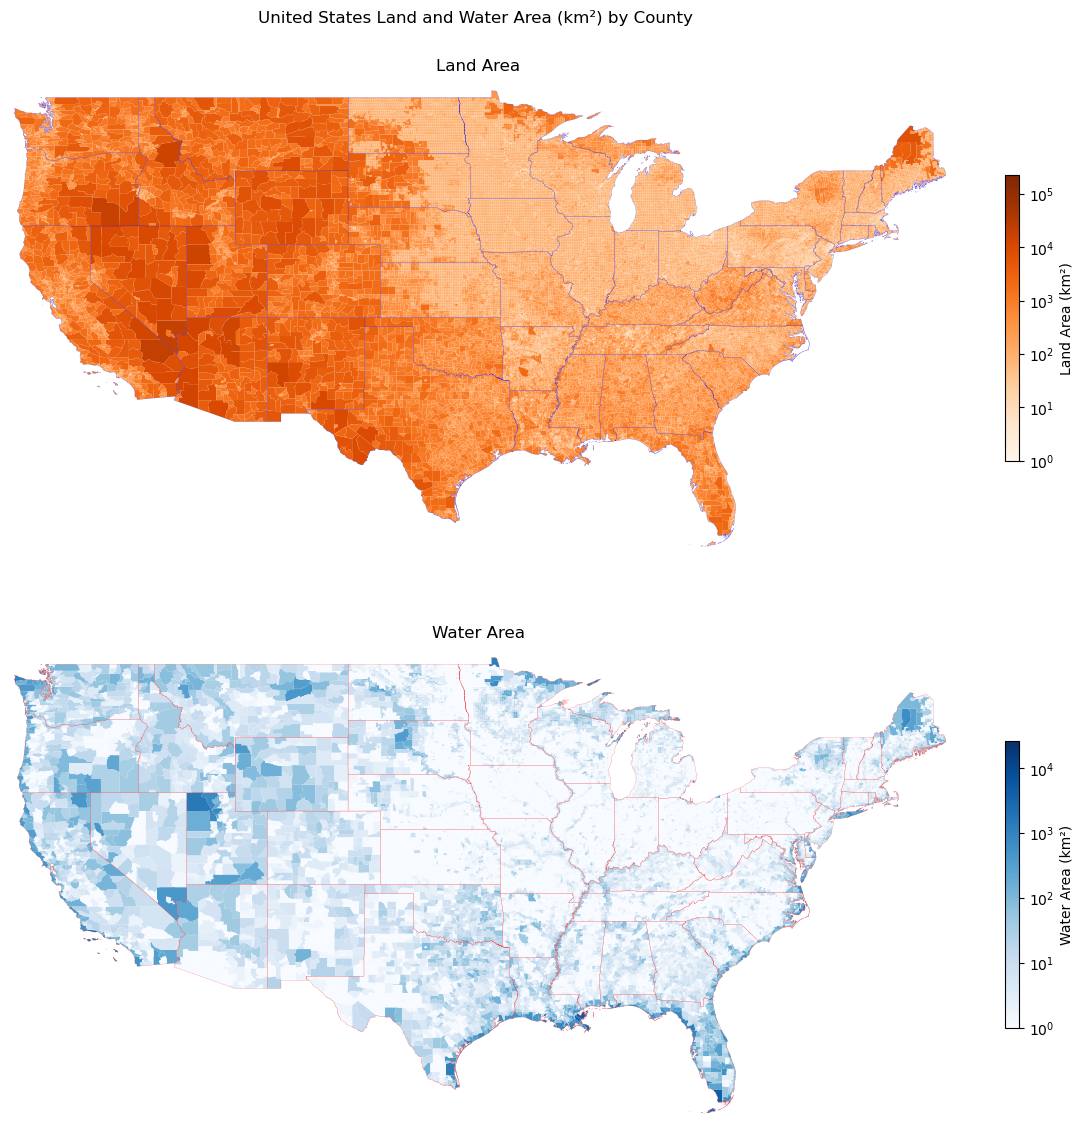

In [14]:
# Convert to km² for readability
cousubs['LAND_km2'] = cousubs['ALAND'] / 1e6
cousubs['WATER_km2'] = cousubs['AWATER'] / 1e6

# Create a vertically stacked layout (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # Vertically stacked

# US Lower 48 Bounding Box
# -125.00000, 24.00000, -67.00000, 50.00000
ax1.set_xlim(US_XLIM1, US_XLIM2)
ax1.set_ylim(US_YLIM1, US_YLIM2)
ax2.set_xlim(US_XLIM1, US_XLIM2)
ax2.set_ylim(US_YLIM1, US_YLIM2)

# Land area (top plot)
cousubs.plot(
    column='LAND_km2',
    cmap='Oranges',
    legend=True,
    ax=ax1,
    legend_kwds={'label': "Land Area (km²)", 'shrink': 0.5},
    norm=SymLogNorm(linthresh=1, vmin=1, vmax=cousubs['LAND_km2'].max()),  # Normalize
)
ax1.set_title("Land Area")

# Water area (bottom plot)
cousubs.plot(
    column='WATER_km2',
    cmap='Blues',
    legend=True,
    ax=ax2,
    legend_kwds={'label': "Water Area (km²)", 'shrink': 0.5},
    norm=SymLogNorm(linthresh=1, vmin=1, vmax=cousubs['WATER_km2'].max()),  # Normalize
)
ax2.set_title("Water Area")

# Add state boundaries for context
states.boundary.plot(ax=ax1, color='blue', linewidth=0.1)
states.boundary.plot(ax=ax2, color='red', linewidth=0.1)

# Turn off axes for both subplots
for ax in [ax1, ax2]:
    ax.set_axis_off()

# Adjust spacing to prevent overlap
plt.suptitle('United States Land and Water Area (km²) by County', x=0.4)
# Update the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-land-water-area-geoplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Scatter plot of Land and water values

These values are plotted by county to show the distribution and outliers

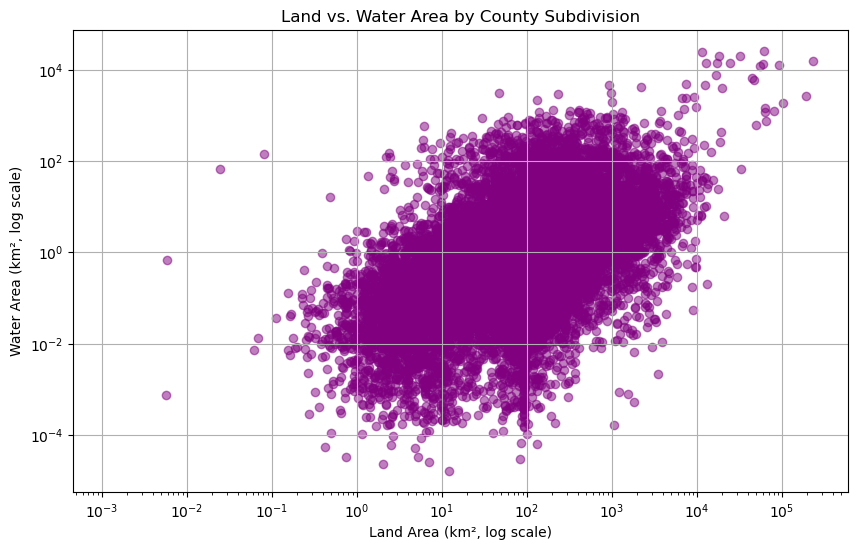

In [15]:
# Convert to km² for readability
cousubs['LAND_km2'] = cousubs['ALAND'] / 1e6
cousubs['WATER_km2'] = cousubs['AWATER'] / 1e6


# 2. Now plot with the correct column name
# fig, ax = plt.subplots(figsize=(15, 8))
plt.figure(figsize=(10, 6))
plt.scatter(
    cousubs['LAND_km2'],
    cousubs['WATER_km2'],
    alpha=0.5,
    c='purple'
)

plt.xscale('log')  # Log scale for skewed data
plt.yscale('log')
plt.xlabel("Land Area (km², log scale)")
plt.ylabel("Water Area (km², log scale)")
plt.title("Land vs. Water Area by County Subdivision")
plt.grid(True)

# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-land-water-area-scatterplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Load the US Census Population data

We will load this file directly from the zip file

In [16]:
# Load national demographics
census_2020_agesex = gpd.read_file('data/nc-est2023-agesex-res.csv', encoding='latin-1')
# Load country population counts
census_2020_all = gpd.read_file('data/co-est2024-alldata.csv', encoding='latin-1')

## Initial look into Census demographics

This will look at the gender differences in the population. Ultimately, this information lacked any interesting data points, so I did not visualize it further.

In [17]:
# Create a copy of the original DataFrame
census_2020_by_sex = census_2020_agesex.copy()

# Convert population columns to numeric
pop_cols = ['ESTIMATESBASE2020', 'POPESTIMATE2020', 'POPESTIMATE2021', 
            'POPESTIMATE2022', 'POPESTIMATE2023']
census_2020_by_sex[pop_cols] = census_2020_by_sex[pop_cols].apply(pd.to_numeric, errors='coerce')

# Sum population estimates by age and sex
age_sex_population = census_2020_by_sex.groupby(['SEX', 'AGE'])['POPESTIMATE2020'].sum().reset_index()

# Display the first few rows
age_sex_population.head()

SEX  AGE  POPESTIMATE2020
0   0    0          3702966
1   0    1          3764198
2   0   10          4188194
3   0  100            75529
4   0   11          4278216

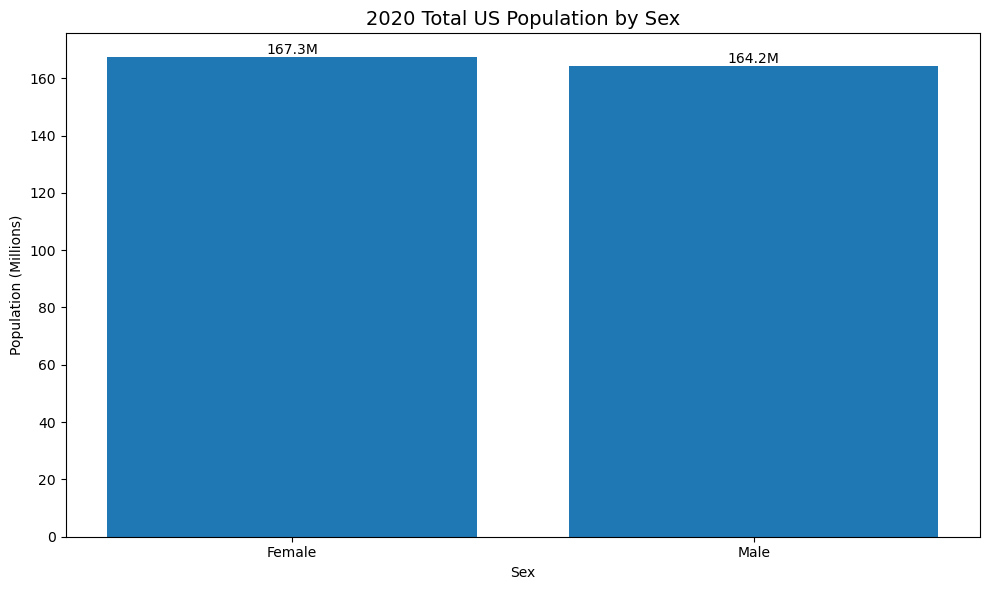

In [18]:
# Filter for total population rows (AGE == 999)
total_pop = census_2020_by_sex[census_2020_by_sex['AGE'] == '999'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert population columns to numeric
pop_cols = ['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023']
total_pop[pop_cols] = total_pop[pop_cols].apply(pd.to_numeric, errors='coerce')

# Group by SEX and sum (in case there are multiple rows per sex)
sex_totals = total_pop.groupby('SEX')[pop_cols].sum().transpose()
sex_mapping = {'1': 'Male', '2': 'Female'}  # Adjust based on your data coding
total_pop['SEX'] = total_pop['SEX'].map(sex_mapping)

# Prepare data for bar chart
bar_data = total_pop.groupby('SEX')['POPESTIMATE2020'].sum().reset_index()

# Setup the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(bar_data['SEX'], bar_data['POPESTIMATE2020']/1e6)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}M',
             ha='center', va='bottom')

# Configure the figure layout
plt.title('2020 Total US Population by Sex', fontsize=14)
plt.ylabel('Population (Millions)')
plt.xlabel('Sex')
plt.xticks(rotation=0)
# Update the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-populate-gender-barplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Census Population Visualizations

This will look at the population metrics from the Census for the years 2020, 2021, 2022, 2023, and 2024.

In [19]:
census_2020_all.head()

SUMLEV REGION DIVISION STATE COUNTY   STNAME         CTYNAME  \
0    040      3        6    01    000  Alabama         Alabama   
1    050      3        6    01    001  Alabama  Autauga County   
2    050      3        6    01    003  Alabama  Baldwin County   
3    050      3        6    01    005  Alabama  Barbour County   
4    050      3        6    01    007  Alabama     Bibb County   

  ESTIMATESBASE2020 POPESTIMATE2020 POPESTIMATE2021  ...  \
0           5025369         5033094         5049196  ...   
1             58800           58909           59191  ...   
2            231767          233244          239411  ...   
3             25226           24975           24517  ...   
4             22284           22176           22344  ...   

  RINTERNATIONALMIG2023 RINTERNATIONALMIG2024 RDOMESTICMIG2021  \
0          2.5495754599          3.0681127652     4.9939051545   
1          1.8806377526          2.2313371616     3.8272650296   
2          3.5511420377          4.1689692951     29.480276311   
3          0.8507879917            1.30606914     -13.49713085   
4          0.0455861236          0.0906043309     11.141060198   

  RDOMESTICMIG2022 RDOMESTICMIG2023 RDOMESTICMIG2024   RNETMIG2021  \
0      5.575298579     5.8753048651     5.0660939575   5.351760364   
1     8.5430558242     8.1549778651      11.92780968  4.0812870449   
2     28.650913191     26.471786596     25.479189087  29.911880759   
3     10.073315868     -1.620548556     -9.632259908  -13.49713085   
4     -13.53576827     -3.464545392      16.89770771  11.185983827   

    RNETMIG2022   RNETMIG2023   RNETMIG2024  
0  7.1861027989  8.4248803249  8.1342067226  
1  9.4511759315  10.035615618  14.159146842  
2  30.506926097  30.022928634  29.648158382  
3  10.966916469  -0.769760564  -8.326190768  
4  -13.44552981  -3.418959269  16.988312041  

[5 rows x 83 columns]

In [20]:
census_2020_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 83 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SUMLEV                 3195 non-null   object
 1   REGION                 3195 non-null   object
 2   DIVISION               3195 non-null   object
 3   STATE                  3195 non-null   object
 4   COUNTY                 3195 non-null   object
 5   STNAME                 3195 non-null   object
 6   CTYNAME                3195 non-null   object
 7   ESTIMATESBASE2020      3195 non-null   object
 8   POPESTIMATE2020        3195 non-null   object
 9   POPESTIMATE2021        3195 non-null   object
 10  POPESTIMATE2022        3195 non-null   object
 11  POPESTIMATE2023        3195 non-null   object
 12  POPESTIMATE2024        3195 non-null   object
 13  NPOPCHG2020            3195 non-null   object
 14  NPOPCHG2021            3195 non-null   object
 15  NPOPCHG2022          

In [21]:
census_2020_all.head()

SUMLEV REGION DIVISION STATE COUNTY   STNAME         CTYNAME  \
0    040      3        6    01    000  Alabama         Alabama   
1    050      3        6    01    001  Alabama  Autauga County   
2    050      3        6    01    003  Alabama  Baldwin County   
3    050      3        6    01    005  Alabama  Barbour County   
4    050      3        6    01    007  Alabama     Bibb County   

  ESTIMATESBASE2020 POPESTIMATE2020 POPESTIMATE2021  ...  \
0           5025369         5033094         5049196  ...   
1             58800           58909           59191  ...   
2            231767          233244          239411  ...   
3             25226           24975           24517  ...   
4             22284           22176           22344  ...   

  RINTERNATIONALMIG2023 RINTERNATIONALMIG2024 RDOMESTICMIG2021  \
0          2.5495754599          3.0681127652     4.9939051545   
1          1.8806377526          2.2313371616     3.8272650296   
2          3.5511420377          4.1689692951     29.480276311   
3          0.8507879917            1.30606914     -13.49713085   
4          0.0455861236          0.0906043309     11.141060198   

  RDOMESTICMIG2022 RDOMESTICMIG2023 RDOMESTICMIG2024   RNETMIG2021  \
0      5.575298579     5.8753048651     5.0660939575   5.351760364   
1     8.5430558242     8.1549778651      11.92780968  4.0812870449   
2     28.650913191     26.471786596     25.479189087  29.911880759   
3     10.073315868     -1.620548556     -9.632259908  -13.49713085   
4     -13.53576827     -3.464545392      16.89770771  11.185983827   

    RNETMIG2022   RNETMIG2023   RNETMIG2024  
0  7.1861027989  8.4248803249  8.1342067226  
1  9.4511759315  10.035615618  14.159146842  
2  30.506926097  30.022928634  29.648158382  
3  10.966916469  -0.769760564  -8.326190768  
4  -13.44552981  -3.418959269  16.988312041  

[5 rows x 83 columns]

## Exploration of the population estimate data

We will look at a bar plot of the total population by state to look for outliers and the top population states. This will give us some insight into where the population changes are most significant.

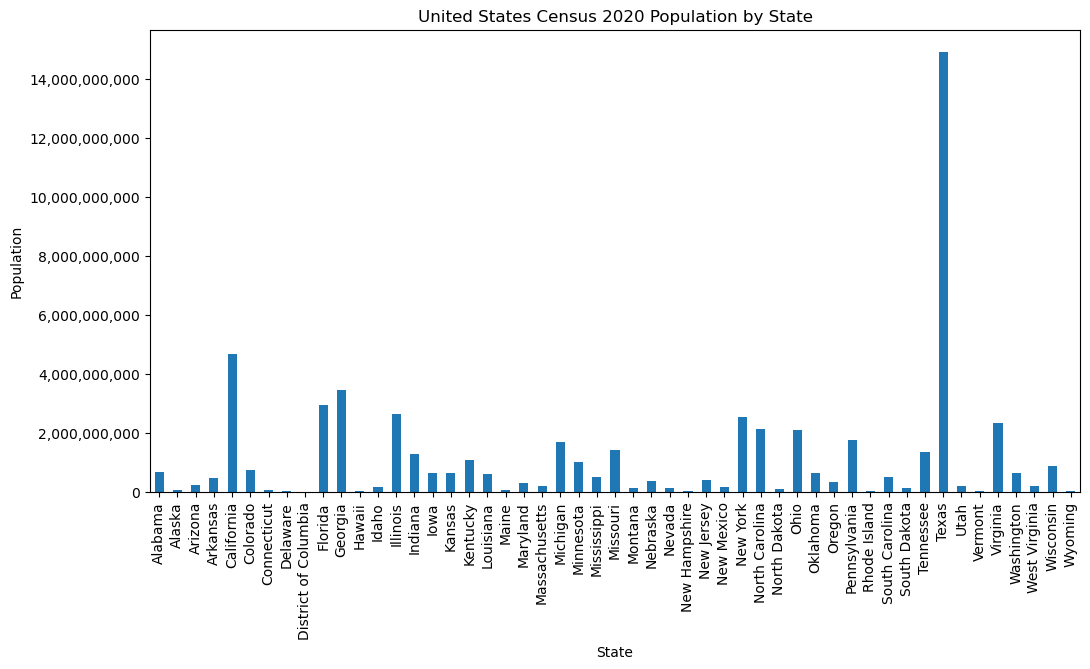

In [22]:
# Create a copy of the original DataFrame
census_2020_by_state = census_2020_all.copy()

# Convert population column to numeric (handling any non-numeric values)
census_2020_by_state['POPESTIMATE2020'] = pd.to_numeric(census_2020_by_state['POPESTIMATE2020'], errors='coerce')

# Now calculate state population totals and add as new column
census_2020_by_state['STATE_POPULATION'] = census_2020_by_state.groupby('STNAME')['POPESTIMATE2020'].transform('sum')

# use groupby() and count() to total up all the tornadoes by state
census_2020_by_state = census_2020_by_state[['STATE_POPULATION','STNAME']]

state_populations = census_2020_by_state.groupby('STNAME')['STATE_POPULATION'].sum().reset_index()

# sort by most tornadoes first
state_populations.sort_values('STATE_POPULATION', ascending=False)

# Create plot
ax = state_populations.plot.bar(figsize=(12,6), x='STNAME', y='STATE_POPULATION', legend=False)

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # No decimals, with commas
plt.title('United States Census 2020 Population by State')
plt.ylabel('Population')
plt.xlabel('State')
plt.xticks(rotation=90)  # Rotate state names for readability

# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-population-state-barplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Exploration of the population deaths data

We will look at a bar plot of the total deaths by state to look for trends and outliers

In [23]:
# Create a copy of the original DataFrame
census_2020_by_state = census_2020_all.copy()

# Convert population column to numeric (handling any non-numeric values)
census_2020_by_state['DEATHS2020'] = pd.to_numeric(census_2020_by_state['DEATHS2020'], errors='coerce')

# Now calculate state population totals and add as new column
census_2020_by_state['STATE_DEATHS'] = census_2020_by_state.groupby('STNAME')['DEATHS2020'].transform('sum')

# use groupby() and count() to total up all the tornadoes by state
census_2020_by_state = census_2020_by_state[['STATE_DEATHS','STNAME']]
state_deaths = census_2020_by_state.groupby('STNAME')['STATE_DEATHS'].sum().reset_index()

# sort by most tornadoes first
state_deaths.sort_values('STATE_DEATHS', ascending=False)

# Create plot
ax = state_deaths.plot.bar(figsize=(12,6), x='STNAME', y='STATE_DEATHS', legend=False)

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # No decimals, with commas
plt.title('United States Census 2020 Deaths by State')
plt.ylabel('Deaths')
plt.xlabel('State')
plt.xticks(rotation=90)  # Rotate state names for readability

# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-deaths-state-barplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

# Visualization of the United States (by State)

This will visualize all the states, with their county boundaries. This way, we can easily identify which county belongs to which state, when viewing the next visualizations (which lack the labeling for easy visualization of data).

In [24]:
# States to filter
states_filter = [
    'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands',
    'Alaska', 'Hawaii', 'Guam', 'American Samoa', 'Puerto Rico'
]

# Setup Plot
fig, ax = plt.subplots(figsize=(16, 10))

# US Lower 48 Bounding Box
# -125.00000, 24.00000, -67.00000, 50.00000
ax.set_xlim(US_XLIM1, US_XLIM2)
ax.set_ylim(US_YLIM1, US_YLIM2)

# Create a custom colormap with one color per state
n_states = len(states['STUSPS'].unique())
colors = plt.cm.tab20(np.linspace(0, 1, n_states))
cmap = ListedColormap(colors)

# Plot with state abbreviations (STUSPS) as categories
cousubs.plot(
    column='STUSPS',           # Use state abbreviations instead of STATEFP
    categorical=True,
    cmap=cmap,
    edgecolor='white',
    linewidth=0.1,
    legend=False,
    ax=ax
)

# Add state abbreviations as annotations
for idx, row in states.iterrows():
    ax.annotate(
        text=row['STUSPS'],  # State abbreviation column
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        va='center',
        fontsize=10,
        color='black'
    )

# Add state boundaries
states.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Drop rows with NaN
states_unique = cousubs['STATE_NAME'].dropna().unique()

states_unique = [x for x in states_unique if x not in states_filter]

# Create custom handles for the legend
legend_elements = [Patch(facecolor=colors[i], 
                      edgecolor='white',
                      label=state) 
                  for i, state in enumerate(sorted(states_unique))]

# Create a custom legend with handles
ax.legend(handles=legend_elements, 
          title='States',
          loc='lower left', 
          fontsize='small',
          ncols=8)

# Update the layout
ax.set_title("US County Subdivisions by State", fontsize=20)
# Disable the axis
ax.set_axis_off()
# Configure the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-map-state-colored-geoplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Census Population Estimates (2020 and 2024)

These are the population estimates for the year 2020 and the year 2024, shown as choropleths. This will help us see the density changes spatially.

In [25]:
# Convert both keys to a string before merging
merged = cousubs.merge(
    census_2020_all,
    left_on='NAMELSADCO',
    right_on='CTYNAME',
    how='left'
)

# Coerce the population 2020 estimate to an Integer 64 type
merged['POPESTIMATE2020'] = pd.to_numeric(merged['POPESTIMATE2020'], errors='coerce').astype('Int64')

# 5. Plotting
fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams['figure.dpi'] = 150  # Increase DPI for sharper rendering

# Base map
states.boundary.plot(ax=ax, color='black', linewidth=0.5)

merged.plot(
    column='POPESTIMATE2020',
    cmap='Blues',
    legend=True,
    ax=ax,
    legend_kwds={'shrink': 0.5, 'label': "Population"},
    edgecolor='white',
    linewidth=0.1,
    rasterized=True,
    norm=SymLogNorm(linthresh=1, vmin=1, vmax=merged['POPESTIMATE2020'].max())  # Normalize
)

ax.set_title('2020 US County Population (Choropleth of Density)', fontsize=18)

# US Lower 48 Bounding Box
# -125.00000, 24.00000, -67.00000, 50.00000
ax.set_xlim(US_XLIM1, US_XLIM2)
ax.set_ylim(US_YLIM1, US_YLIM2)
# Disable the axis
ax.set_axis_off()

# Configure the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-map-population-2020-choropleth-geoplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

In [26]:
# Convert both keys to a string before merging
merged = cousubs.merge(
    census_2020_all,
    left_on='NAMELSADCO',
    right_on='CTYNAME',
    how='left'
)

# Coerce the population 2020 estimate to an Integer 64 type
merged['POPESTIMATE2024'] = pd.to_numeric(merged['POPESTIMATE2024'], errors='coerce').astype('Int64')

# 5. Plotting
fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams['figure.dpi'] = 150  # Increase DPI for sharper rendering

# Base map
states.boundary.plot(ax=ax, color='black', linewidth=0.5)

merged.plot(
    column='POPESTIMATE2024',
    cmap='YlOrBr',
    legend=True,
    ax=ax,
    legend_kwds={'shrink': 0.5, 'label': "Population"},
    edgecolor='white',
    linewidth=0.1,
    rasterized=True,
    norm=SymLogNorm(linthresh=1, vmin=1, vmax=merged['POPESTIMATE2024'].max())  # Normalize
)

ax.set_title('2024 US County Population (Choropleth of Density)', fontsize=18)

# US Lower 48 Bounding Box
# -125.00000, 24.00000, -67.00000, 50.00000
ax.set_xlim(US_XLIM1, US_XLIM2)
ax.set_ylim(US_YLIM1, US_YLIM2)
# Disable the axis
ax.set_axis_off()

# Configure the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-map-population-2024-choropleth-geoplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Population Changes Line Plot

This will plot out the population estimates, the regression line, and the Confidence Interval (CI). This will give us a better insight into the population changes and the rates of growth in population and migration.

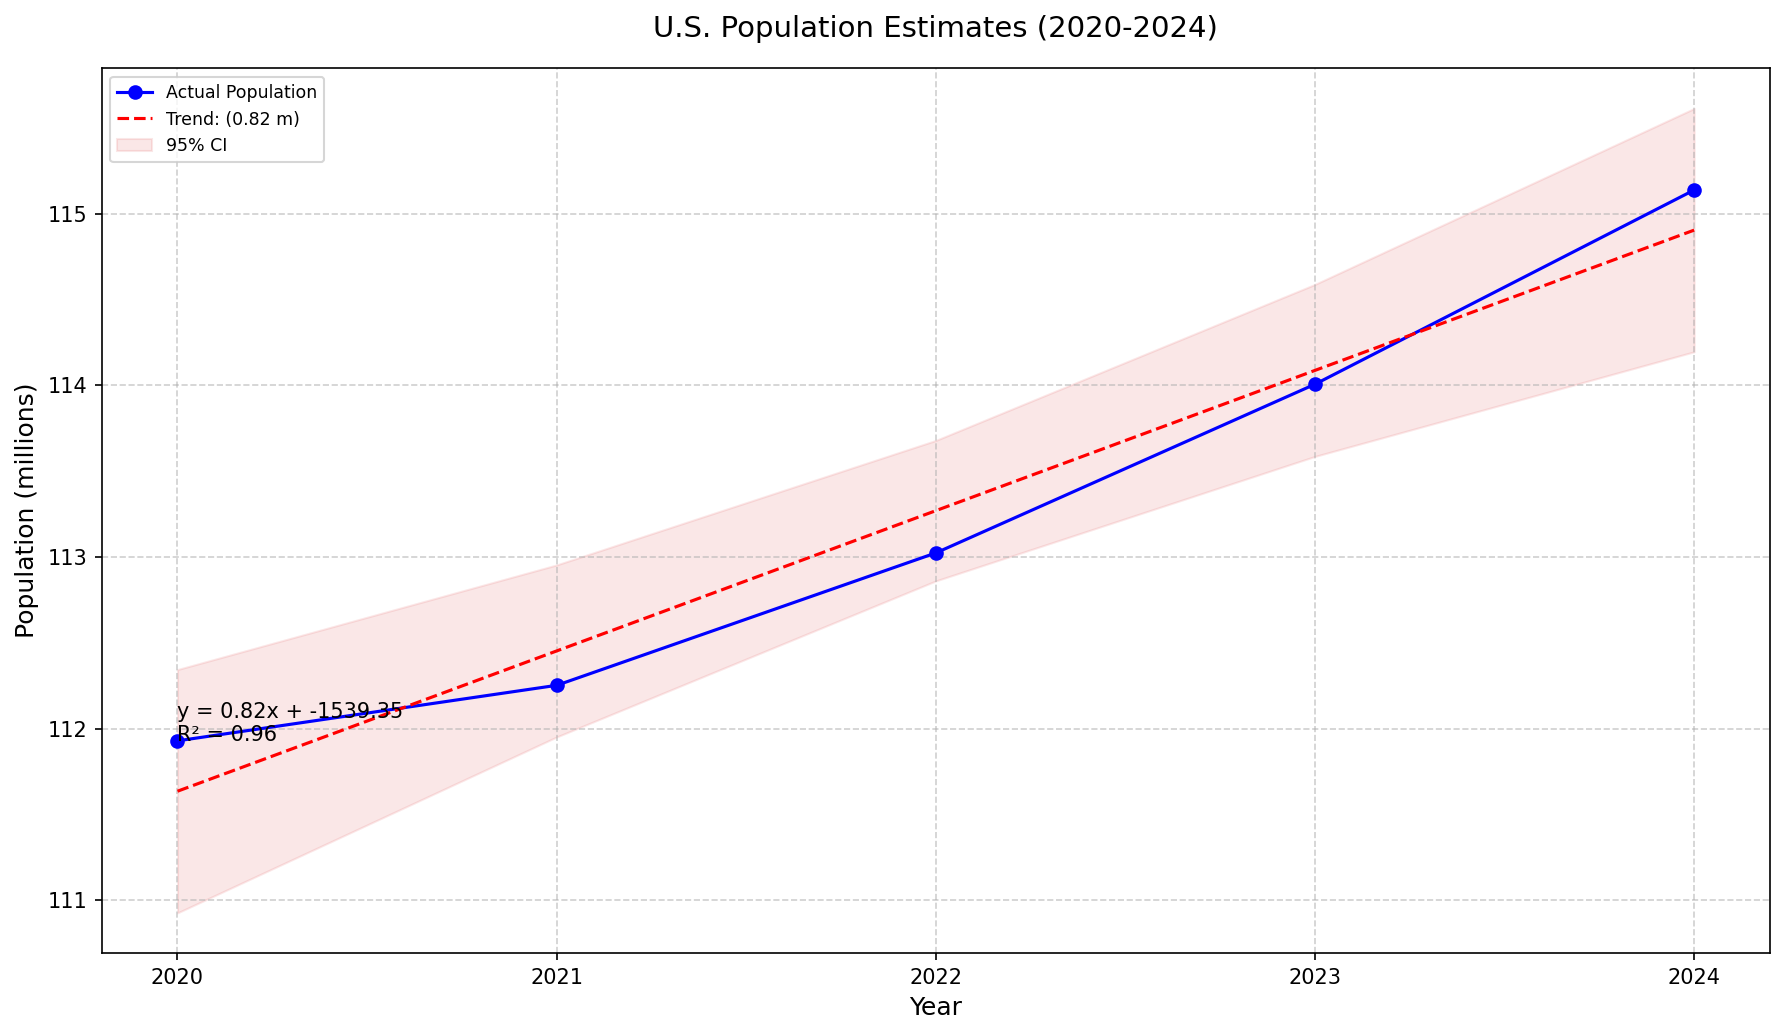

In [27]:
# Reduce to unique counties
unique_cousubs = cousubs.groupby('COUNTYFP').first().reset_index()

# Convert both keys to a string before merging
merged = unique_cousubs.merge(
    census_2020_all,
    left_on='NAMELSADCO',
    right_on='CTYNAME',
    how='left'
)

# Aggregate population by year
pop_years_cols = ['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022', 'POPESTIMATE2023', 'POPESTIMATE2024']
total_pop = merged[pop_years_cols].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('Int64')).sum() / 1e6
# total_pop = merged[pop_years].sum()
total_pop.index = [2020, 2021, 2022, 2023, 2024]  # Set years as index
years = np.array([2020, 2021, 2022, 2023, 2024])  # Ensure this is numpy array

# Setup the plot
plt.figure(figsize=(12, 7))
plt.plot(total_pop.index, total_pop.values, 
         marker='o', linestyle='-', color='blue', label='Actual Population')

# Regression
X = total_pop.index.values.reshape(-1, 1)
y = total_pop.values
model = LinearRegression().fit(X, y)
trend = model.predict(X)
plt.plot(total_pop.index, trend, 
         color='red', linestyle='--', 
         label=f'Trend: ({model.coef_[0]:.2f} m)')

# Fixed confidence interval calculation
X = years.reshape(-1, 1)
y = total_pop.values
model = LinearRegression().fit(X, y)

# Correct confidence interval formula
n = len(y)
y_pred = model.predict(X)
residuals = y - y_pred
dof = n - 2
t = stats.t.ppf(0.975, dof)  # 95% confidence
s_err = np.sqrt(np.sum(residuals**2) / dof)
ci = t * s_err * np.sqrt(1/n + (X - X.mean())**2 / np.sum((X - X.mean())**2))

# Force dimension alignment
years = years.ravel()  # Flatten to (5,)
y_pred = y_pred.ravel()  # Flatten to (5,)
ci = ci.ravel()  # Flatten to (5,)

# Now the plotting will work
plt.fill_between(years, 
                y_pred - ci, 
                y_pred + ci,
                color='#d7191c', 
                alpha=0.1, 
                label='95% CI')

# Annotations
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r2 = f'R² = {model.score(X, y):.2f}'
plt.text(2020, total_pop.min(), f'{equation}\n{r2}', fontsize=10)

# Formatting
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (millions)', fontsize=12)
plt.title('U.S. Population Estimates (2020-2024)', fontsize=14, pad=15)
plt.xticks(total_pop.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize='small')
# Configure the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-map-population-regression-lineplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

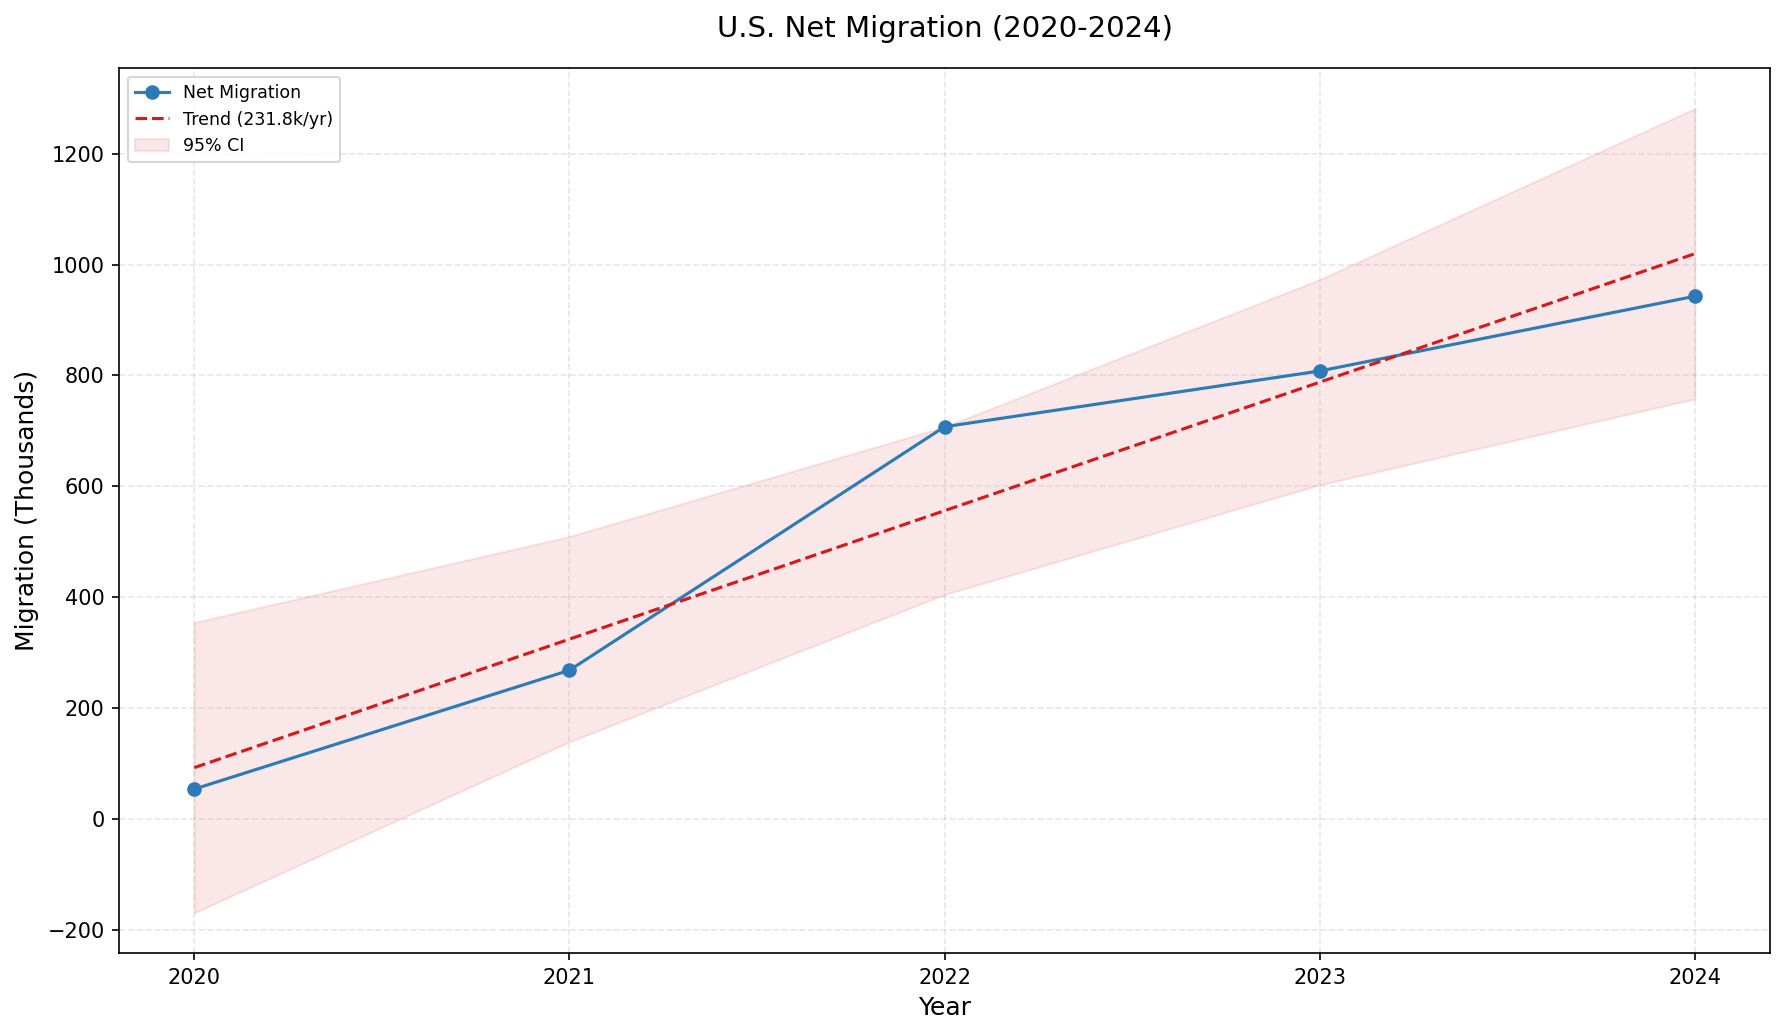

In [28]:
# Load and prepare data
net_mig_cols = ['NETMIG2020', 'NETMIG2021', 'NETMIG2022', 'NETMIG2023', 'NETMIG2024']
net_mig = merged[net_mig_cols].apply(lambda x: pd.to_numeric(x, errors='coerce')).sum() / 1e3
years = np.array([2020, 2021, 2022, 2023, 2024])  # Ensure this is numpy array

# Fixed confidence interval calculation
X = years.reshape(-1, 1)
y = net_mig.values
model = LinearRegression().fit(X, y)

# Correct confidence interval formula
n = len(y)
y_pred = model.predict(X)
residuals = y - y_pred
dof = n - 2
t = stats.t.ppf(0.975, dof)  # 95% confidence
s_err = np.sqrt(np.sum(residuals**2) / dof)
ci = t * s_err * np.sqrt(1/n + (X - X.mean())**2 / np.sum((X - X.mean())**2))

# Setup the plot
plt.figure(figsize=(12, 7))

# Main data line
plt.plot(years, y, 'o-', color='#2c7bb6', 
         label='Net Migration')

# Regression line
plt.plot(years, y_pred, '--', color='#d7191c',
         label=f'Trend ({model.coef_[0]:.1f}k/yr)')

# Force dimension alignment
years = years.ravel()  # Flatten to (5,)
y_pred = y_pred.ravel()  # Flatten to (5,)
ci = ci.ravel()  # Flatten to (5,)

# Now the plotting will work
plt.fill_between(years, 
                y_pred - ci, 
                y_pred + ci,
                color='#d7191c', 
                alpha=0.1, 
                label='95% CI')

# Formatting
plt.title('U.S. Net Migration (2020-2024)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration (Thousands)', fontsize=12)
plt.xticks(years)
plt.grid(ls='--', alpha=0.3)
plt.legend(fontsize='small')
# Configure the layout
plt.tight_layout()
# Save the graph as a PNG
plt.savefig(
    'JoshuaSummers_usmap-census-map-netmigration-regression-lineplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()